# Analyzing college majors and their employment prospects
Edwin Basil Mathew  
DATA 512  
University of Washington 

## Introduction

Year after year, students take on the decision of going to college. With that comes the necessity of deciding on what to study. With the plenty of choices around and ease of flow of incomplete information, it is very easy for students to mess up their career decisions and end up with something that they had not signed up for. They need to have a better understanding of what entails signing up for a major - not just in terms of income statistics, but also temporary and full-time year round employment prospects, gender distribution, etc. Although plenty of data is collected by agencies like Census, but they just stay there as it is unless they are brought forward in the form of some intelligent and meaningful analysis that can save students pain for long time. In today's time, we have to take into account factors other than one's strengths areas to decide majors keeping in mind the holistic understanding of what it would take to reach where they think they want to be and is it something they are willing to go through.

## Background

We are living in the technology age, when one does not necessarily have to go to school in order to have a successful career. People can gain certain types of skills from the luxury of their home. But, time and again there are articles like [this](https://www.nytimes.com/2014/05/27/upshot/is-college-worth-it-clearly-new-data-say.html?hp&_r=1&abt=0002&abg=0) one from New York Times where they say college degree has never been more valuable. These are backed by studies like [this](https://libertystreeteconomics.newyorkfed.org/2014/09/the-value-of-a-college-degree.html#.VA6Uh_mwLwk) one conducted by the Federal Reserve Bank of New York. The same study had found that college students who earn in the lowest quartile are earning less than what half the high school graduates made. Even if students enroll in colleges, many college students don’t even end up graduating and therefore end up with student debt in addition to lack of job. While this is happening there would be high school graduates who would already have been working for 4 years without student debt ([Source](https://www.wsj.com/articles/SB10001424127887324595904578117400943472068)).

Although entities collect data on major enrolments and graduation, they are rarely helpful for students in making informed decisions. It is necessary to bring around messages that are loud and clear from the datasets and share them in a manner that is easy to interpret while sharing all the assumptions that went into arriving at those insights.

This is why I have proposed certain research questions that I think can reveal some key information for decision-making in major selection:  

- Are there any majors in which people have high employment rate, but low full-time year-round (FTYR) employment rate?
- Does employment chance increase when a student decides to go to graduate school?
- Top 5 major categories in which there are >90% men and those with >90% women? 

### Data

These datasets are coming from American Community Survey 2010-2012 Public Use Microdata Series (PUMS) of US Census Bureau. The data falls under the open data series as mentioned here: https://www.census.gov/about/policies/open-gov/open-data.html

Link to the data: http://www.census.gov/programs-surveys/acs/data/pums.html

There are three main data files with information on wages, gender and type of job.

- all-ages.csv: Employment statistics for all majors (173 majors) for all ages. This includes how many poeple have thta major, how many are employed, how many are employed full-time year-round, no. of unemployed people in those majors and the quartile distribution of income in those majors.
- recent-grads.csv: For ages <28, it gives major-wise, how many men and women in that field. This also captures features as are captured in the all_ages data. In addition, this data also captures information on college jobs, non-college jobs and low wage jobs amongst the people in those majors.
- grad-students.csv: Grad vs non-grad comparison of majors on the basis of features that are also captured in the datasets above.

There are additional datasets majors_list.csv and women_stem.csv, but it is found that they capture redundant information that is already captured in the datasets above.

The privacy concerns with Census data are taken care of due to the deidentification measure incorporated by US Census Bureau to preserve user privacy. In addition, the datasets are at an aggregated level of majors which leads to blurring out data at an individual level.

## Methodology

The datasets used are flat files that can be analyzed locally without need of any special hardware resources. As there are around 173 majors and the messages are better converyed after grouping them, I use 15 major categories instead to do the analysis. I have created effective plots like line charts, bar charts and boxplots for trends across majors that convey important messages of my analysis clearly. Line charts and bar charts highlight the variation in gap between general employment rate and full-time year-round employment rate in Question 1 and between grad and non-grad unemployment rate for Question 2. For Question 3, boxplot perfectly convery the distribution of median incomes for the various majors falling under the two buckets >80% men and >80% women.

After studying the human-centred considerations in the DATA 512 course, I have made every attempt to make all the steps taken here as transparent and explained as possible. This notebbok is supposed to be reproducible, so that others may also try out the analysis on their own to confirm the results or to build further upon it. To preserve privacy of those who participated in the survey, U.S. Census Bureau incorporates deidentification measures to make sure that a piece of information cannot be traced back to the actual person. In addition, this data has been aggregated at majors level. Therefore, user information is not traceable. In addition, a part of this analysis is dedicated to bring to surface gender-based biases in adoption of majors. This analysis also leaves room to ask further questions, bring in additional data and answer more questions pertaining to biases.

For the implementation below, it is assumed that the user has installed numpy, pandas and matplotlib on their system before executing the codes below.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

Importing the datasets. Remember to change the directories to where the datasets are downloaded to from Github.

In [2]:
all_ages = pd.read_csv('D:/Own Stuff/Acads/DATA 512/data/college-majors/all-ages.csv') # Data at major level
grad_students = pd.read_csv('D:/Own Stuff/Acads/DATA 512/data/college-majors/grad-students.csv') # Data at major level split by grad/nongrad
recent_grads = pd.read_csv('D:/Own Stuff/Acads/DATA 512/data/college-majors/recent-grads.csv') # Data ata mjor level for the recent grads

We view sample records from all datasets for Petroleum Engineering to compare the three datasets.

In [3]:
all_ages[all_ages['Major']=='PETROLEUM ENGINEERING'].head() # Population data

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0


In [4]:
np.unique(all_ages.Major_category)

array(['Agriculture & Natural Resources', 'Arts',
       'Biology & Life Science', 'Business',
       'Communications & Journalism', 'Computers & Mathematics',
       'Education', 'Engineering', 'Health', 'Humanities & Liberal Arts',
       'Industrial Arts & Consumer Services', 'Interdisciplinary',
       'Law & Public Policy', 'Physical Sciences',
       'Psychology & Social Work', 'Social Science'], dtype=object)

In [5]:
grad_students[grad_students['Major']=='PETROLEUM ENGINEERING'].head() # From overall population

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
52,2419,PETROLEUM ENGINEERING,Engineering,7479,164,5640,4869,112,0.019471,124000.0,80000,200000.0,18483,13108,11334,580,0.042373,126000.0,75000,215000.0,0.288075,-0.015873


In [6]:
recent_grads.head() # Another sample from population

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### Question 1

#### Are there any majors in which people have high employment rate, but low full-time year-round (FTYR) employment rate?

There are seen to be two kinds of employment that the participants can have, either general employment or full-time year-round (FTYR) employment. People are defined to be FTYR employed when they work more than 35 houer per week and more than 50 weeks per hour. Those with FTYR employmnet have job security and the others have a lot more flexibility. Thus, it becomes important to know how stable the professions can be after people take up a major because general employment does not necessarily reflect how easily people are able to find jobs that they want to do. 

Below, we aggregate the data at Major category level and find the total, employed and FTYR employed people in that major category. After this, we calculate the employment rates for both the types of employment and then sort the table on employment rate in descending order.

In [7]:
temp = all_ages.groupby('Major_category')[['Total', 'Employed', 'Employed_full_time_year_round']].sum()
temp['ER'] = temp['Employed']/temp['Total']
temp['FTER'] = temp['Employed_full_time_year_round']/temp['Total']
temp.reset_index(level=0, inplace=True)

In [8]:
temp = temp.sort_values(by=['ER'])
temp

,Major_category,Total,Employed,Employed_full_time_year_round,ER,FTER
6,Education,4700118,2833199,1867112,0.602793,0.397248
9,Humanities & Liberal Arts,3738335,2499175,1743508,0.668526,0.466386
13,Physical Sciences,1025318,707126,547587,0.689665,0.534066
15,Social Science,2654125,1871803,1440338,0.705243,0.542679
2,Biology & Life Science,1338186,947058,682524,0.707718,0.510037
14,Psychology & Social Work,1987278,1411983,993289,0.710511,0.499824
1,Arts,1805865,1308695,854606,0.724691,0.473239
10,Industrial Arts & Consumer Services,1033798,753782,545785,0.729139,0.527942
7,Engineering,3576013,2621966,2216012,0.733209,0.619688
8,Health,2950859,2192692,1535113,0.743069,0.520226


Below is the visualization of how employment rate and FTR employment rate varies between different major categories.

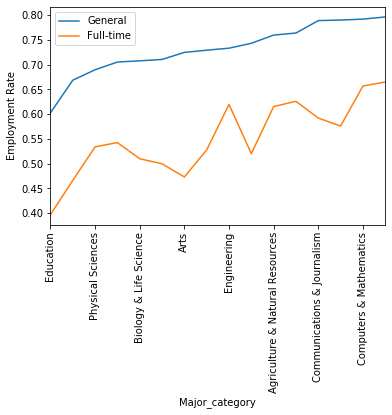

In [9]:
ax = temp.plot.line(x='Major_category', y=['ER', 'FTER'], rot=90)
ax.set_ylabel('Employment Rate')
ax.legend(['General', 'Full-time'])

#### Findings

- It is clear from the above graph in Arts majors, full-time employment rate is the second-lowest. In addition, the proportion of full-time employment rate compared to overall employment rate is the lowest for Arts majors as well (this can also be seen through the wide gap betwene the two types of employments for Arts majors). This means that many of the jobs for art majors are not very stable.
- We also see that both the types of employments are the lowest for Education majors. So, they not only have lower employment rate, but stability-wise also, Education is a weak major. On the other end of this spectrum is Law and Public Policy, immediately followed by Computers & Mathematics.

### Question 2

#### Does employment chance increase when a student decides to go to graduate school?

The grad/non-grad status of the people who take up these majors is captured in the grad_students dataset. We explore the first 5 rows in the dataset.

In [10]:
grad_students.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,53000,110000.0,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,40000,89000.0,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,45000,100000.0,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,24500,85000.0,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,40600,83700.0,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


We aggregate the data at major category level and find out the no. of employed and unemployed grad and non-grads.

In [11]:
temp = grad_students.groupby('Major_category')[['Grad_employed', 'Grad_unemployed', 'Nongrad_employed', 'Nongrad_unemployed']].sum()

In [12]:
temp

,Grad_employed,Grad_unemployed,Nongrad_employed,Nongrad_unemployed
Major_category,,,,
Agriculture & Natural Resources,179287,4995,453541,16437
Arts,422450,24559,1194452,88900
Biology & Life Science,1365336,32022,831399,44656
Business,2124495,101994,7123852,393222
Communications & Journalism,368390,17733,1285961,86476
Computers & Mathematics,716607,29062,1332370,70960
Education,2437166,66938,2659824,111875
Engineering,1634563,65073,2483802,132162
Health,1148800,25962,2058011,63621


Below, we find the unemployment rate for grads and non-grads.

In [13]:
temp['Grad_UR'] = temp['Grad_unemployed']/(temp['Grad_unemployed'] + temp['Grad_employed'])
temp['Nongrad_UR'] = temp['Nongrad_unemployed']/(temp['Nongrad_unemployed'] + temp['Nongrad_employed'])

In [14]:
temp.reset_index(level=0, inplace=True)
temp

,Major_category,Grad_employed,Grad_unemployed,Nongrad_employed,Nongrad_unemployed,Grad_UR,Nongrad_UR
0,Agriculture & Natural Resources,179287,4995,453541,16437,0.027105,0.034974
1,Arts,422450,24559,1194452,88900,0.054941,0.069272
2,Biology & Life Science,1365336,32022,831399,44656,0.022916,0.050974
3,Business,2124495,101994,7123852,393222,0.045809,0.052311
4,Communications & Journalism,368390,17733,1285961,86476,0.045926,0.063009
5,Computers & Mathematics,716607,29062,1332370,70960,0.038974,0.050565
6,Education,2437166,66938,2659824,111875,0.026731,0.040363
7,Engineering,1634563,65073,2483802,132162,0.038286,0.050521
8,Health,1148800,25962,2058011,63621,0.022100,0.029987
9,Humanities & Liberal Arts,1986572,85033,2289696,154239,0.041047,0.063111


Now, we plot the unemployement rates for both grads and non-grads for various major categories.

Text(0, 0.5, 'Unemployment Rate')

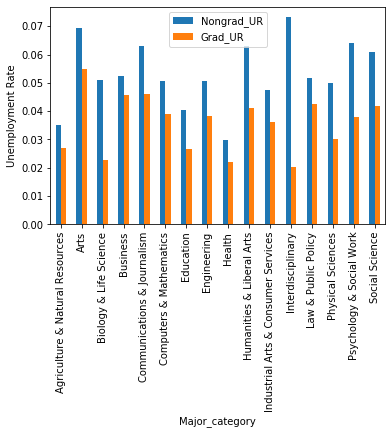

In [15]:
ax = temp.plot.bar(x='Major_category', y=['Nongrad_UR', 'Grad_UR'])
ax.set_ylabel('Unemployment Rate')

Seeing what are the actual majors that fall under Interdiciplinary majors category.

In [16]:
grad_students.loc[grad_students['Major_category']=='Interdisciplinary', 'Major']

40    MULTI/INTERDISCIPLINARY STUDIES
Name: Major, dtype: object

We have this feature called Grad_premium in the grad_students data that captures if grad students have benefits in terms of income comapred to non-grads.

In [17]:
grad_students[grad_students['Grad_premium']<0]

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
39,2403,ARCHITECTURAL ENGINEERING,Engineering,6466,143,4857,4264,304,0.058903,78000.0,56000,110000.0,18500,12772,10648,889,0.065076,80000.0,52000,106000.0,0.258992,-0.025000
52,2419,PETROLEUM ENGINEERING,Engineering,7479,164,5640,4869,112,0.019471,124000.0,80000,200000.0,18483,13108,11334,580,0.042373,126000.0,75000,215000.0,0.288075,-0.015873
81,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,5032,98,2758,2276,261,0.086452,54000.0,45000,81000.0,8092,5978,4707,239,0.038443,55000.0,39000,78000.0,0.383420,-0.018182


#### Findings 

- Unemployment rate between graduates and nongraduates is widest in Interdisciplinary majors and smallest in Business majors.
- Also, one special observation about interdisciplinary majors is that the graduate unmployment rate is the lowest and the nongrad unemployment rate is highest. This means that it is worthwhile to have a graduate degree for Interdisciplinary majors, while not so much for Business majors. 
- Another important finding is that for nongrads, Health has the lowest unemployment rate. 
- Architectural Engineering, Petroleum Engineering and Miscellaneous Agriculture have lower average salaries for grads than nongrads unlike for other majors.
- And overall takeaway is that grads have lower unemployment rate than nongrads in that discipline.

### Question 3

#### Top 5 major categories in which there are >90% men and those with >90% women? 

Observing the top 5 rows of the recent_grads data that will be used to answer this question.

In [18]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [19]:
# Top 5 majors with highest share of women
temp1 = recent_grads.sort_values(by=['ShareWomen'], ascending=False)
temp1['Major'][:5]

164                        EARLY CHILDHOOD EDUCATION
163    COMMUNICATION DISORDERS SCIENCES AND SERVICES
51                        MEDICAL ASSISTING SERVICES
138                             ELEMENTARY EDUCATION
150                     FAMILY AND CONSUMER SCIENCES
Name: Major, dtype: object

In [20]:
# Top 5 majors with highest share of men
temp2 = recent_grads.sort_values(by=['ShareWomen'])
temp2['Major'][:5]

73                          MILITARY TECHNOLOGIES
66    MECHANICAL ENGINEERING RELATED TECHNOLOGIES
26                          CONSTRUCTION SERVICES
1                  MINING AND MINERAL ENGINEERING
3       NAVAL ARCHITECTURE AND MARINE ENGINEERING
Name: Major, dtype: object

No. of majors in which there are more than 90% women.

In [21]:
len(temp2.loc[temp2['ShareWomen']>0.9, 'Major'])

8

This is very low for the inferences from this analysis to be meaningful. Hence, I instead investigate the bucket of majors in which there are more than 80% women. Let's see average of median salaries in the two buckets

In [22]:
temp3 = pd.DataFrame({'>80% Women':temp1.loc[temp1['ShareWomen']>0.8, 'Median'], '>80% Men':temp2.loc[temp2['ShareWomen']<0.2, 'Median']})

Text(0, 0.5, 'Median salaries of the profession')

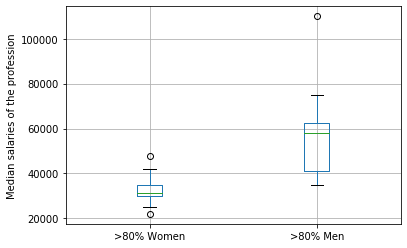

In [23]:
temp3.boxplot()
plt.ylabel('Median salaries of the profession')

Text(0, 0.5, 'Median salaries of the profession')

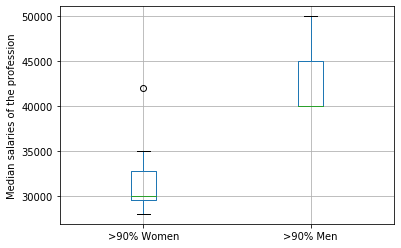

In [24]:
temp4 = pd.DataFrame({'>90% Women':temp1.loc[temp1['ShareWomen']>0.9, 'Median'], '>90% Men':temp2.loc[temp2['ShareWomen']<0.1, 'Median']})
temp4.boxplot()
plt.ylabel('Median salaries of the profession')

#### Findings

- The prominent theme for professions with > 90% women is seen to be health, family and education and professions with > 90% men are mostly around military and construction engineering. 
- The median salaries for men dominated professions is 22.33% higher than women dominated professions whereas the 99th percentile value (upper whisker) is 77.64% higher.
- When the salaries are plotted for professions with more than 90% men and women, it is seen that there is no overlap in the two buckets (if we ignore the outlier clearly visibly in the >90% Women bucket of majors)

## Discussions

The findings from this study show that not all professions have the same outlook (which is obvious to many). What is not obvious is how they differ. Educational institutions are supposed to prepare students for certain types of professions. The results here indicate the stability in professions following various majors. This is in addition to the general and full-time year round employment prospects of various majors.

In addition, many a times, students just go to graduate school either due to peer pressure or because they do not know what better to do. This is an easy way to end up making career mistakes. The results show for which majors it makes sense to go to graduate schools and gain skills that would be in demand when working afterwards.

Disparity in salaries in terms of gender is a widely discusssed topic and this analysis not just supports this, but also shows that Education is one of the sectors where there are more than 90% women and also it has highest unemployment rate among all majors. This study does not investigate into the reasons behind low proportion of women in other disciplines with higher employment prospects. In addition, this analysis does not take into account the cost of studying that majors that the students have to incur to get their education.

## Conclusion

In the first question, while answering which majors have high difference between general employment rate and full-time year-round employment rate, it is seen that the gap is the widest for Arts majors and most of the jobs are not full-time year-round for Arts majors. Also, for Education sector, both general employment rate and full-time employment rate are found to be amongst the lowest. While taking majors like Arts, students should be prepared to have unstable jobs (i.e. not full-time year-round).

Then, in the second research question on observing use of going to grad school, it is learnt that Interdisciplinary majors witness the highest difference in unemployment rates for grads and non-grads and Business majors observes the lowest. Also, for nongrads, Health majors have the lowest unemployment rates. This means that for Interdisciplinary majors, it makes sense to go to graduate school from an employment standpoint.

Finally, in the third research question, it is found that the Top 5 majors with highest proportion of men is military and construction engineering and for women, it is Health, family and Education sector. This helps understand which majors attract more people from a particular gender. We also see a significant difference between median and 99th percentile salaries for majors falling in the two buckets: majors with >80% men and majors with >80% women.

## References

- Casselman, B. (2014) The Economic Guide To Picking A College Major [Online]. Available: https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/.
- Leonhardt, D. (2014) Is College worth it? Clear new data say [Online]. Available: https://www.nytimes.com/2014/05/27/upshot/is-college-worth-it-clearly-new-data-say.html?hp&_r=1&abt=0002&abg=0. 
- Abel, J. and Deitz, R. (2014) The Value of a College Degree [Online]. Available: https://libertystreeteconomics.newyorkfed.org/2014/09/the-value-of-a-college-degree.html#.VA6Uh_mwLwk.
- Casselman, B. (2012) The Cost of Dropping Out [Online]. Available: https://www.wsj.com/articles/SB10001424127887324595904578117400943472068.